## Emergency Vehicle Detection

The dataset includes images of vehicle like private car, emergency vehicle like police vehicle, ambulance vehicle, firefighter vehicle.**The objective is to classify images into Emergency vehicle or non emergency vehicle**. There are many challenges in image data like other vehicles, roads, buildings etc

In [1]:
import pandas as pd
import skimage
from skimage.io import imshow,imread,imsave
import numpy as np
from google.colab import drive
from sklearn.model_selection import train_test_split
from keras.models import *
from keras.layers import *
from keras.activations import *
from keras.initializers import *
from keras.models import *
from keras.layers import *
from keras.activations import *
from keras.initializers import *
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!unzip \Energency_Dataset.zip

In [6]:
labelled_data = pd.read_csv("Energency_Dataset/Dataset/emergency_classification.csv")
labelled_data.head()

,image_names,emergency_or_not
0,0.jpg,1
1,1.jpg,1
2,2.jpg,1
3,3.jpg,1
4,4.jpg,1


# Visualize Data

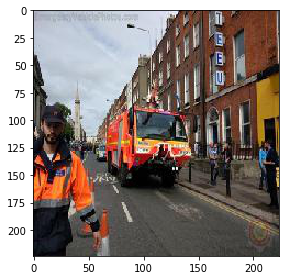

In [8]:
imshow(X[10])

Data Challanges : Roads, people, buildings etc.

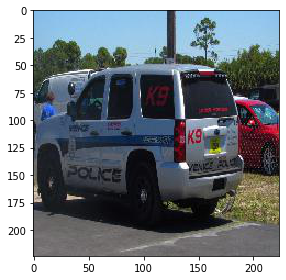

In [9]:
imshow(X[100])

Data Challanges : Other vehicle in image

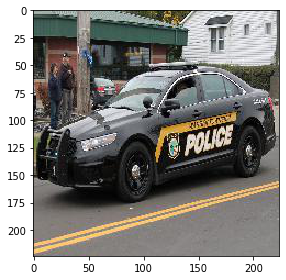

In [10]:
imshow(X[90])

Data Challanges : buildings, police & bike.

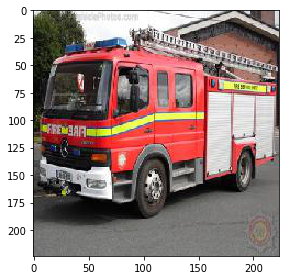

In [11]:
imshow(X[900])

In [12]:
X_CNN = X

In [13]:
# Y variable
Y = labelled_data.emergency_or_not
print(Y.shape)

X_train,X_test,Y_train,Y_test = train_test_split(X_CNN,Y,test_size = 0.3,random_state = 42)

print(X_train.shape)
print(Y_train.shape)

(2352,)
(1646, 224, 224, 3)
(1646,)


In [15]:
model = Sequential()
model.add(InputLayer(input_shape=(224,224,3)))
model.add(Conv2D(25,(6,6),activation = 'relu',strides = (1,1)))  
model.add(MaxPool2D(pool_size=(4,4)))   
model.add(Conv2D(50,(6,6),activation = 'relu',strides = (1,1)))
model.add(MaxPool2D(pool_size=(4,4)))   
model.add(Flatten())
model.add(Dense(units = 100,activation = 'relu'))
model.add(Dropout(0.7))
model.add(Dense(units = 1, activation = 'sigmoid')) 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 219, 219, 25)      2725      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 54, 54, 25)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 49, 49, 50)        45050     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 50)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 7200)              0         
                                                                 
 dense (Dense)               (None, 100)               7

In [16]:
early_stopping = EarlyStopping(monitor = 'val_loss',min_delta=0.001,patience = 5, mode= 'min')

In [17]:
model.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [18]:
trained_model = model.fit(X_train,Y_train,epochs = 128, batch_size = 258, validation_data =(X_test,Y_test),callbacks = [early_stopping])

Epoch 1/128
7/7 [==============================] - 19s 1s/step - loss: 0.8000 - accuracy: 0.5334 - val_loss: 0.6711 - val_accuracy: 0.5609
Epoch 2/128
7/7 [==============================] - 3s 419ms/step - loss: 0.6359 - accuracy: 0.6434 - val_loss: 0.6123 - val_accuracy: 0.6501
Epoch 3/128
7/7 [==============================] - 3s 420ms/step - loss: 0.5688 - accuracy: 0.7145 - val_loss: 0.5322 - val_accuracy: 0.7224
Epoch 4/128
7/7 [==============================] - 3s 423ms/step - loss: 0.5179 - accuracy: 0.7558 - val_loss: 0.4986 - val_accuracy: 0.7606
Epoch 5/128
7/7 [==============================] - 3s 419ms/step - loss: 0.5128 - accuracy: 0.7594 - val_loss: 0.4902 - val_accuracy: 0.7578
Epoch 6/128
7/7 [==============================] - 3s 421ms/step - loss: 0.4867 - accuracy: 0.7752 - val_loss: 0.4810 - val_accuracy: 0.7649
Epoch 7/128
7/7 [==============================] - 3s 419ms/step - loss: 0.4685 - accuracy: 0.7928 - val_loss: 0.4641 - val_accuracy: 0.7805
Epoch 8/128
7/7

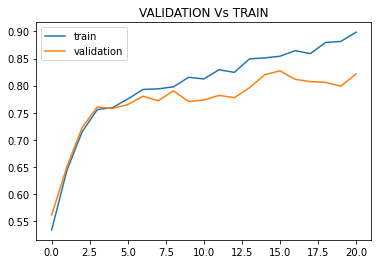

In [21]:
plot('accuracy','val_accuracy','train','validation') 

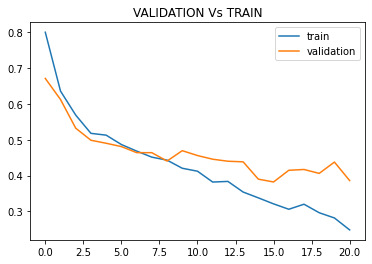

In [22]:
plot('loss','val_loss','train','validation')

In [23]:
test_loss, test_acc = model.evaluate(X_test, Y_test)

23/23 [==============================] - 1s 29ms/step - loss: 0.3861 - accuracy: 0.8215


# Accuracy of the model 82.15 %